<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Renato Bassi Castillo ; 201773521-K ; Malla Nueva </h4>
    <h4> Joaquín Castillo Tapia ; 201773520-1 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Abril 2019</h4></center>
</p>

## 1. Sarcasmo en Reddit 
>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset



**R.-** El dataset contiene los comentarios de la plataforma web reddit. Estos comentarios vienen clasificados en sarcásticos o no sarcásticos, además de indicar el autor, la categoría a la que pertenecen (subreddit), puntaje de 'likes' y 'dislikes', la fecha y hora en qué se realizó, y por último el comentario al que se está respondiendo.

#### Extracción de datos 

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt


# Diccionarios en dónde se guardarán los datos

Ds = {}     # Sarcasticos
Dn = {}     # No Sarcasticos
Dt = {}     # Total
Dps = {}    # Promedio de puntaje de los comentarios Sarcasticos
Dpn = {}    # Promedio de puntaje de los comentarios No Sarcasticos
Ts = {}     # Cantidad de cometarios Sarcasticos por mes
Tn = {}     # Cantidad de comentarios No Sarcasticos por mes

T=0         # contador para saber la cantidad de comentarios

Lbs = []    # Lista con los puntajes de cada comentario Sarcastico
Lbn = []    # Lista con los puntajes de casa comentario No Sarcastico

with open('reddit.csv', newline='') as File:  
    reader = csv.reader(File)
    for line in reader:
        #print(line[0])
        if (line[3]!='subreddit'):
            if(line[3] not in Dt):
                Dt[line[3]]=0
            Dt[line[3]]+=1
            T+=1
            if (line[0]=="1"):
                if (line[4] not in Dps):
                    Dps[line[4]]=0
                if (line[3] not in Ds):
                    Ds[line[3]]=0
                Lbs.append(int(line[4]))
                Dps[line[4]]+=1
                Ds[line[3]]+=1
                if (line[7] not in Ts):
                    Ts[line[7]]=0
                Ts[line[7]]+=1
            else:
                if (line[4] not in Dpn):
                    Dpn[line[4]]=0
                if (line[3] not in Dn):
                    Dn[line[3]]=0
                Lbn.append(int(line[4]))
                Dpn[line[4]]+=1
                Dn[line[3]]+=1
                if (line[7] not in Tn):
                    Tn[line[7]]=0
                Tn[line[7]]+=1

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 

**R.-** Para responder esto analizaremos los datos a través de un grafico que nos indique el porcentaje de predominancia en ambos casos. Existe la posibilidad de que existan subreddits en donde sólo haya 1 comentario, por ende su predominancia será del 100%. Para evitar estos casos haremos 3 filtros por cantidad de comentarios, graficaremos los 10 subreddits que tengan una cantidad de comentarios mayor a 100, a 1000 y a 10000.


### Desarrollo

#### Definición de funciones a utilizar:

**Ordenar(dict D)**

_Función que recibe un diccionario **D** y devuelve una lista de tuplas con los datos ordenados (de mayor a menor) según el segundo elemento de la lista_

In [116]:
def Ordenar(D):
    L=[]
    def second(e):
        return e[1]

    L = list(D.items())
    L = sorted(L,key=second)
    L.reverse()
    
    return L

**Graficar_p(list L,str title, str y_name, str x_name, int minimo)**

_Función que obtiene los porcentajes de la lista **L** y luego grafica los 10 porcentajes más altos.
También se le hace entrega de un entero **mínimo**, el cual corresponde al filtro de cantidad mínima de comentarios en los subreddits graficados._

In [117]:
def Graficar_p(L,title,y_name,x_name,minimo):
    D={}
    for i in L:
        if (Dt[i[0]] >= minimo):
            p = (i[1]/Dt[i[0]])*100
            D[i[0]]=p
    l=Ordenar(D)
    
    x=[]
    y=[]

    for i in l[:10:]:
        x.append(i[0])
        y.append(i[1])


    y_pos = np.arange(len(y))
    performance = x

    plt.barh(y_pos, y, align='center', alpha=0.5)
    plt.yticks(y_pos, x)
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.title(title)

    plt.show()

#### Construcción de Gráficos

##### filtro: subreddit con más de 100 comentarios

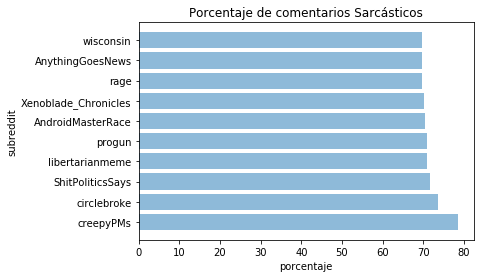

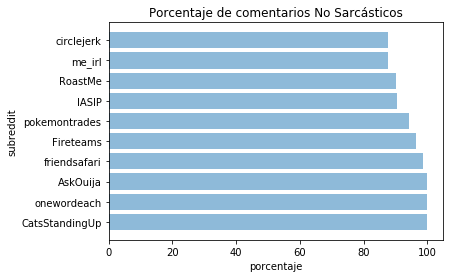

In [118]:
Graficar_p(Ordenar(Ds),"Porcentaje de comentarios Sarcásticos","subreddit","porcentaje",100)
Graficar_p(Ordenar(Dn),"Porcentaje de comentarios No Sarcásticos","subreddit","porcentaje",100)

#### Análisis y Respuesta

Al observar los gráficos nos podemos dar cuenta que en el subreddit _creepyPMs_ predominan los comentarios Sarcásticos, alcanzando casi un _80%_. En cuanto a los comentarios No Sarcásticos, se observa que los subreddits que predominan son _AskOuija_, _onewordeach_ y _CatsStandingUp_, los cuales alcanzan el _100%_ de predominancia.

##### filtro: subreddit con más de 1000 comentarios

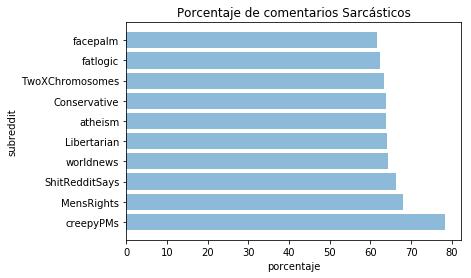

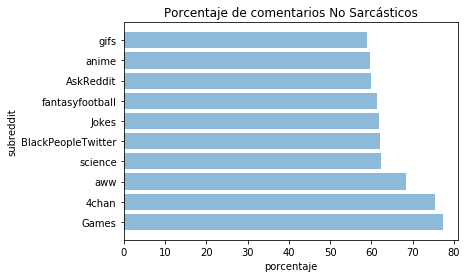

In [119]:
Graficar_p(Ordenar(Ds),"Porcentaje de comentarios Sarcásticos","subreddit","porcentaje",1000)
Graficar_p(Ordenar(Dn),"Porcentaje de comentarios No Sarcásticos","subreddit","porcentaje",1000)

#### Análisis y Respuesta

Para este filtro se evidencia que el subreddit _creepyPMs_ mantiene la predominancia en comentarios Sarcásticos obteniendo un porcentaje cercano al _80%_.
En cuanto a los comentarios No Sarcásticos cambio totalmente la gráfica, pues para este filtro el subbreddit donde predominan los comentarios No Sarcásticos es _Games_ alcanzando un valor cercano al _80%_.

##### filtro: subreddit con más de 10000 comentarios

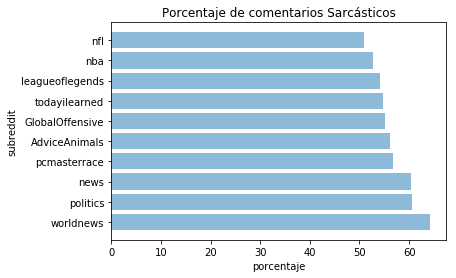

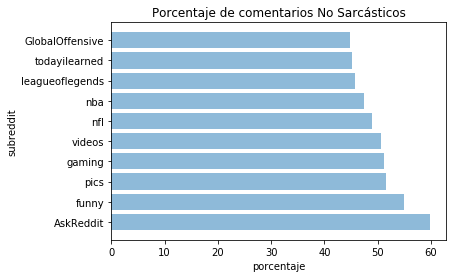

In [120]:
Graficar_p(Ordenar(Ds),"Porcentaje de comentarios Sarcásticos","subreddit","porcentaje",10000)
Graficar_p(Ordenar(Dn),"Porcentaje de comentarios No Sarcásticos","subreddit","porcentaje",10000)

#### Análisis y Respuesta

Para este último filtro, y quizás el que nos da una vista más general, se observa que el subrredit en que predominan los comentarios Sarcásticos es _worldnews_, el cual supera el _60%_ de predominancia.
En cuanto a los comentarios No Sarcásticos, el subreddit que predomina, con un _60%_, es _AskReddit_.

>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

### Desarrollo

##### Funciones a utilizar:

**Graficar(list L, str title, str y_name, str x_name)**

_Función que grafica los 10 primeros elementos de una lista de tuplas **L**, en donde
el segundo elemento de la tupla es la frecuencia del primero.
La función también recibe 3 strings: el titulo **title**, el nombre del eje x_ (**x_name**) _y el nombre del eje y_  (**y_name**). 

In [121]:
def Graficar(L,title,y_name,x_name):
    x=[]
    y=[]

    for i in L[:10:]:
        x.append(i[0])
        y.append(i[1])


    y_pos = np.arange(len(y))
    performance = x

    plt.barh(y_pos, y, align='center', alpha=0.5)
    plt.yticks(y_pos, x)
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.title(title)

    plt.show()

##### Construcción de gráficos

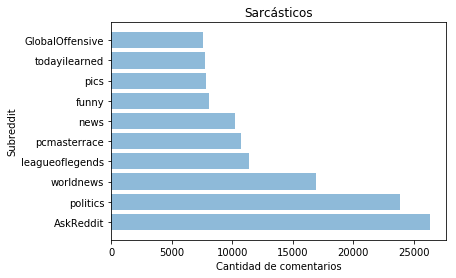

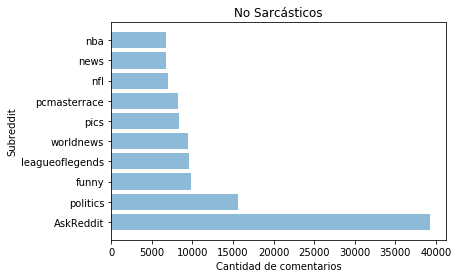

In [122]:
Graficar(Ordenar(Ds), "Sarcásticos", "Subreddit", "Cantidad de comentarios")
Graficar(Ordenar(Dn), "No Sarcásticos", "Subreddit", "Cantidad de comentarios")

#### Analisís y Respuesta

Al observar ambos gráficos se evidencian dos similitudes, el top 1 y el top 2 es el mismo en ambos casos, siendo los subreddit _AskReddit_ y _politics_ respectivamente. Esto se puede deber a varias principalmente a que ambos son los subreddits con mayor cantidad de comentarios, por ende la probabilidad de contener una gran cantidad de comentarios Sarcásticos y No Sarcásticos es mayor. Por otro lado _politics_ es un subreddit donde predominan las discusiones idelógicas, por ende es entendible que los comentarios Sarcásticos sean abundantes. 
Otra similitud destacable es la presencia, en ambos tops, de los subreddits _pics_, _funny_, _news_, _leagueoflegens_ y _worldnews_. Esto puede deberse a que son subreddits con temas populares entre los usuarios, por ende, al igual que el caso anterior, la cantidad de comentarios de ambos tipos es esperable. 

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

**R.-** Para la construcción de la línea de tiempo se utilizará la cantidad de comentarios por cada mes. Al ser una gran cantidad de datos, para facilitar el análisis se decidió dividir la línea de tiempo en 4 gráficos distintos.

### Desarrollo

#### Clasificación de los datos extraídos.

In [123]:
tiemposi = list(Ts.items())
tiempono = list(Tn.items())
tiemposi.sort()
tiempono.sort()
txsi = []
tysi = []
txno = []
tyno = []

for i in tiemposi:
    txsi.append(i[0])
    tysi.append(i[1])
for i in tiempono:
    txno.append(i[0])
    tyno.append(i[1])

#### Construcción de la Línea de tiempo

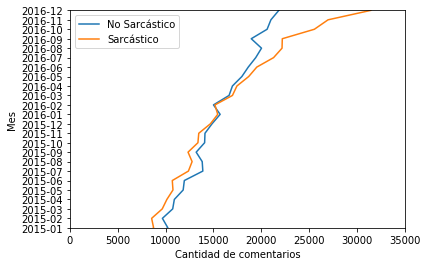

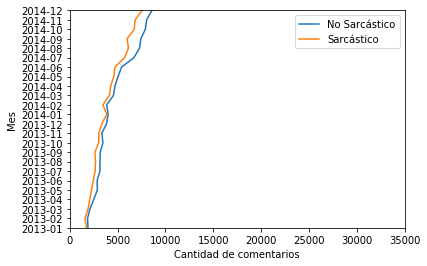

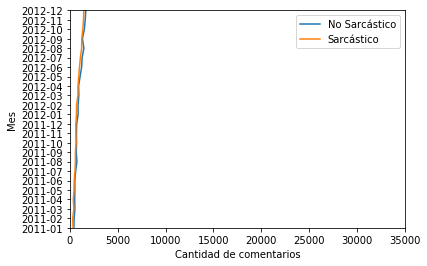

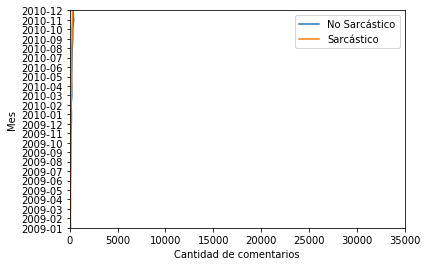

In [124]:
plt.plot(tysi[:], txsi[:])
plt.plot(tyno[:], txno[:])
plt.axis([0, 35000, "2015-01", "2016-12"])
plt.xlabel('Cantidad de comentarios')
plt.ylabel('Mes')
plt.legend(['No Sarcástico','Sarcástico'],loc=0)
plt.show()

plt.plot(tysi[:], txsi[:])
plt.plot(tyno[:], txno[:])
plt.axis([0, 35000, "2013-01", "2014-12"])
plt.xlabel('Cantidad de comentarios')
plt.ylabel('Mes')
plt.legend(['No Sarcástico','Sarcástico'],loc=0)
plt.show()

plt.plot(tysi[:], txsi[:])
plt.plot(tyno[:], txno[:])
plt.axis([0, 35000, "2011-01", "2012-12"])
plt.xlabel('Cantidad de comentarios')
plt.ylabel('Mes')
plt.legend(['No Sarcástico','Sarcástico'],loc=0)
plt.show()

plt.plot(tysi[:], txsi[:])
plt.plot(tyno[:], txno[:])
plt.axis([0, 35000, "2009-01", "2010-12"])
plt.xlabel('Cantidad de comentarios')
plt.ylabel('Mes')
plt.legend(['No Sarcástico','Sarcástico'],loc=0)
plt.show()

#### Análisis y Respuesta

Si analizamos los gráficos podemos notar que en la segunda mitad del año 2016 los comentarios sarcásticos superaron con creces a los No Sarcásticos, lo cual pudo ser debido a la campaña electoral para el cargo de Presidente de los Estados Unidos, la cual estuvo cargada de polémica por la postura del candidato, en ese entonces, Donald Trump.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, compárelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

### Desarrollo

##### Funciones a utilizar

**Histograma(dict D, int x_mx, int x_mn, int y_mx, str title, str x_name, str y_name)**

_Función que construye un Histograma a partir de los datos entregados en el diccionario **D**. _
_además recibe los limites de cada eje _(**x_mn**, **x_mx** y **y_mx**).  _El titulo del Histograma viene dado por el str title, y 
el nombre de cada eje viene dado por los str_  **x_name**  _para x, e _ **y_name para** _y._ 

In [125]:
def Histograma(D,cant,x_mx,x_mn,y_mx,title,x_name,y_name):
    x=[]
    y=[]

    for i in D.items():
        x.append(int(i[0]))
        y.append(i[1])

    valor_max = max(x)
    valor_min = min(x)


    fr_max = max(y)
    fr_min = min(y)

    rango = valor_max - valor_min

    k = int(np.log2(len(D)))

    Amplitud = rango/k

    plt.hist(x,cant,(valor_min, valor_max),False,y)

    plt.axis([x_mn, x_mx, 0,y_mx])
    plt.title(title)
    plt.ylabel(y_name)
    plt.xlabel(x_name)

    plt.show()

**mediana(list L)**

_Función que recibe una lista **L** ordenada y obtiene la mediana muestral._

In [126]:
def mediana(L):
    m = len(L)
    if (m%2==0):
        mdn = int(L[int((m/2)-1)]+L[int(m/2)])/2
    else:
        mdn = L[int(m/2)]
    return mdn

**Boxplots(list L1, str name_L1, list L2, str name_L2, str title, list rango_y)**

_Función que construye dos boxplots a partir de dos listas con datos **L1** y **L2**, cada lista de datos 
tiene su propio nombre de identificación_ **name_L1**_ y _**name_L2** _respectivamente. La figura final lleva por título
**title** y va entre los rangos entregados por la lista_ **rango_y**. 

In [127]:
def BoxPlots(L1,name_L1,L2,name_L2,title,rango_y):
    plt.boxplot([L1,L2],labels=[name_L1,name_L2])
    plt.title(title)
    axes = plt.gca()
    axes.set_ylim(rango_y)
    plt.show()

##### Construcción de Histogramas

**R.-** Para analizar mejor los datos compararemos los histogramas de diferentes tramos de puntaje.

##### 1.- puntaje entre -25 y 100 puntos.

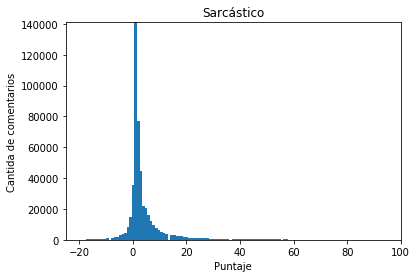

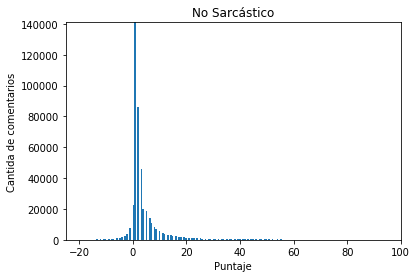

In [134]:
Histograma(Dps,10000,100,-25,141000,"Sarcástico","Puntaje","Cantida de comentarios")
Histograma(Dpn,10000,100,-25,141000,"No Sarcástico","Puntaje","Cantida de comentarios")

###### Análisis y Respuesta

Al observar los histogramas se puede no se aprecian grandes diferencias. Ambos cuentan con un sesgo positivo, lo que significa que el puntaje de los comentarios suele tomar valores _negativos_ o _cero_. El histograma de comentarios No Sarcásticos muestra espacios en blancos, lo que se interpreta como la ausencia de comentarios con ese puntaje, lo que indica que este tipo de comentario es menos votado, en otras palabras, los comentarios No Sarcásticos son menos impactantes para los usuarios, por ende causan indiferencia al lector. No así con los comentarios Sarcásticos, los cuales causan impacto en los lectores motivándolos a votar. Esto se evidencia en la continuidad de las barras del histograma de comentarios Sarcásticos.

##### 2.- puntaje entre 10 y 100 puntos

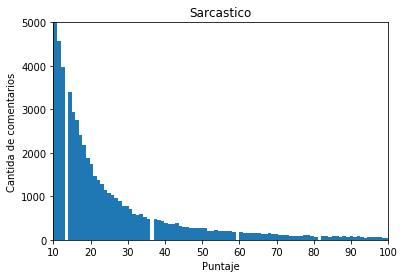

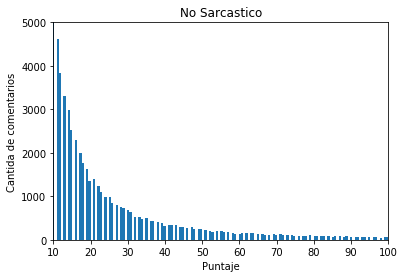

In [129]:
Histograma(Dps,10000,100,10,5000,"Sarcastico","Puntaje","Cantida de comentarios")
Histograma(Dpn,10000,100,10,5000,"No Sarcastico","Puntaje","Cantida de comentarios")

###### Análisis y Respuesta


En este tramo de puntajes es más evidente el sesgo positivo en ambos histogramas, pero con diferencias evidentes en la cantidad de comentarios por puntaje, pues existen más comentarios Sarcásticos que comentarios No Sarcásticos para un mismo puntaje. En algunos puntos hay ausencia de comentarios No Sarcásticos, esto debido a las mismas razones dadas anteriormente.

##### 3.- puntaje entre -50 y -2 puntos

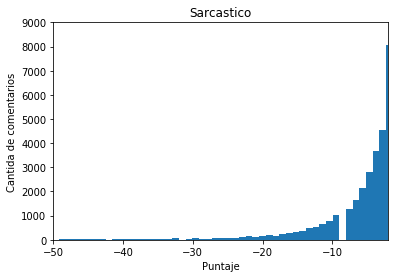

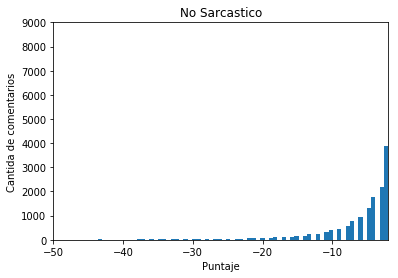

In [130]:
Histograma(Dps,10000,-2,-50,9000,"Sarcastico","Puntaje","Cantida de comentarios")
Histograma(Dpn,10000,-2,-50,9000,"No Sarcastico","Puntaje","Cantida de comentarios")

##### Análisis y Respuesta

A diferencia de los casos anteriores en este tramo de puntajes se observa un sesgo negativo, pero indica lo mismo que el primer caso, hay una gran cantidad de comentarios con puntaje cercano a 0. La cantidad de comentarios por puntaje es visiblemente diferente, pues se aprecia que hay muchos más comentarios Sarcásticos que comentarios No Sarcásticos para un mismo puntaje. Al estar en un tramo de puntajes negativos, se puede concluir que los puntajes negativos predominan en los comentarios Sarcásticos, denotando así que este tipo de comentarios no le gusta a los usuarios.

##### Construcción de Boxplots

En la lista de datos existe una gran cantidad de _outliers_, tanto superiores como inferiores. Por lo tanto, para analizar
mejor los datos obtendremos los limites superiores e inferiores de cada lista de datos.

In [131]:
Q1s = mediana(sorted(Lbs)[:int(len(Lbs)/2):])

Q2s = mediana(sorted(Lbs))

Q3s = mediana(sorted(sorted(Lbs)[:int(len(Lbs)/2):-1]))

IQRs = Q3s - Q1s

limite_sups = Q3s+1.5*IQRs
limite_infs = Q1s-1.5*IQRs

Q1n = mediana(sorted(Lbn)[:int(len(Lbn)/2):])

Q2n = mediana(sorted(Lbn))

Q3n = mediana(sorted(sorted(Lbn)[:int(len(Lbn)/2):-1]))

IQRn = Q3n - Q1n

limite_supn = Q3n+1.5*IQRn
limite_infn = Q1n-1.5*IQRn

Analizamos los resultados obtenidos y calculamos el mejor rango para representar los boxplots.

In [132]:
if (limite_sups > limite_supn):
    ymx = limite_sups + 5
else: 
    ymx = limite_supn + 5
    
if (limite_infs < limite_infn):
    ymn = limite_infs - 5
else: 
    ymn = limite_infn - 5

Por último construimos los Boxplots y mostramos de manera explícita el valor de cada cuartil.

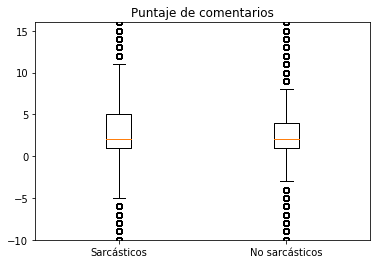

Q3 - Sarcáticos: 5.0 -- No Sarcásticos: 4.0
Q2 - Sarcáticos: 2.0 -- No Sarcásticos: 2.0
Q1 - Sarcáticos: 1.0 -- No Sarcásticos: 1.0


In [136]:
BoxPlots(Lbs,"Sarcásticos",Lbn,"No sarcásticos","Puntaje de comentarios",[ymn,ymx])

print("Q3 - Sarcáticos:",Q3s, "-- No Sarcásticos:",Q3n)
print("Q2 - Sarcáticos:",float(Q2s), "-- No Sarcásticos:",float(Q2n))
print("Q1 - Sarcáticos:",Q1s, "-- No Sarcásticos:",Q1n)

##### Análisis y Respuesta

En base a los Boxplots, y el valor de los cuartiles, se puede afirmar que los puntajes de los comentarios Sarcásticos son más dispersos, pues la diferencia de las medianas muestrales es mayor (Q3 - Q1). Esto se evidencia en el largo de los bloxplots, pues el correspondiente a los comentarios No Sarcásticos es más pequeño. La mediana muestral para ambos casos es la misma, indicando que a pesar de haber diferencia en dispersión y cantidad (analizada en los histogramas), los dos tipos de comentarios se dividen por el valor _2_. 

Individualmente para cada boxplot, se concluye que el _25%_ de los comentarios Sarcásticos tiene un puntaje mayor a 5, y que otro _25%_ tiene un puntaje menor a 1. En resumen la mitad de los comentarios tiene un puntaje entre 1 y 5.
En cambio el 50% de los comentarios No Sarcásticos tiene un puntaje entre 1 y 4, denotando que este tipo de comentarios suele tener un puntaje menos disperso en relación a los comentarios Sarcásticos.


## 2. Simulaciones 

### 2.1 Lanzamiento de Agujas


In [1]:
import random
import math as mt
import scipy.stats as ss

### Desarrollo

**R.-** Para la representación del experimento se utilizarán cajas con superficie igual a 20, 10 y 30 unidades cuadradas. En cada caja se dejarán caer 10, 100, 1000 y 10000 agujas.

#### Funciones a utilizar

**Agujas(int N, int tamaño)**

_Función que genera una representación gráfica del experimento para **N** agujas en una caja de superficie igual al **tamaño** entregado._

In [202]:
def Agujas(N,tamaño):
    laguja = 1
    nlineas = tamaño
    naguja = N
    corte = 0


    for i in range(naguja):
        x = random.random() * nlineas
        y = random.random() * nlineas
        angulo = random.random() * 360
        ylinea = int(y) + 1
        if (angulo<=180):
            xdisp = x + ((laguja/2.0)*mt.cos(mt.radians(angulo)))
            xdisn = x - ((laguja/2.0)*mt.cos(mt.radians(angulo)))
            disp = y + ((laguja/2.0)*mt.sin(mt.radians(angulo)))
            disn = y - ((laguja/2.0)*mt.sin(mt.radians(angulo)))
            plt.plot([xdisn, x, xdisp],[disn, y, disp])
            if (disp >= ylinea) or (int(y) >= disn):
                corte +=1
        else:
            xdisp = x + ((laguja/2.0)*mt.cos(mt.radians(angulo)))
            xdisn = x - ((laguja/2.0)*mt.cos(mt.radians(angulo)))
            disp = y - ((laguja/2.0)*mt.sin(mt.radians(angulo)))
            disn = y + ((laguja/2.0)*mt.sin(mt.radians(angulo)))
            plt.plot([xdisn, x, xdisp],[disn, y, disp])
            if (disp >= ylinea) or (int(y) >= disn):
                corte +=1
        
    plt.hlines(range(nlineas),0,nlineas)        
    plt.axis([0, nlineas, 0, nlineas])
    plt.show()
    
    print(corte)
    print((corte/N))
    #print(2*naguja/corte)

##### Representación Gráfica

Debajo de cada gráfico se mostrará la cantidad de agujas que atraviesan alguna línea horizontal, y además la probabilidad de que una aguja atraviese una línea horizontal según el experimento.

###### 10 agujas

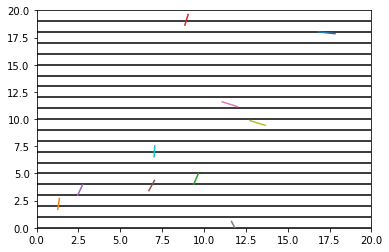

6
0.6


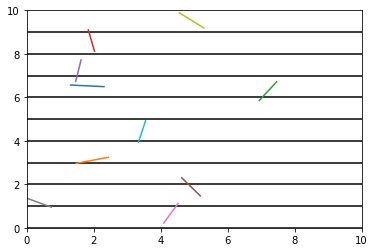

8
0.8


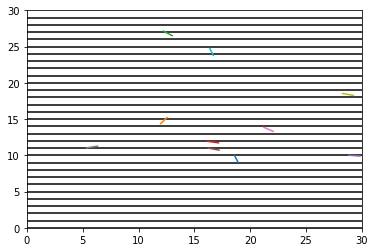

5
0.5


In [212]:
Agujas(10,20)
Agujas(10,10)
Agujas(10,30)

##### Análisis y Respuesta

Se observa que la probabilidad en cada caja para igual número de agujas es totalmente diferente. Por lo tanto, se puede inferir que la cantidad de agujas que atraviesa alguna línea horizontal es dependiente del tamaño de la caja, obteniéndose una probabilidad mayor para cajas más pequeñas.

###### 100 agujas

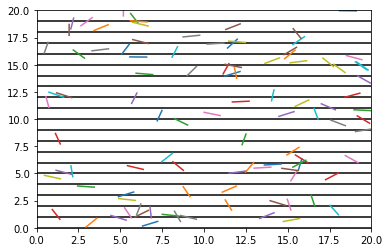

60
0.6


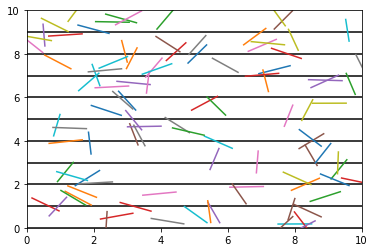

62
0.62


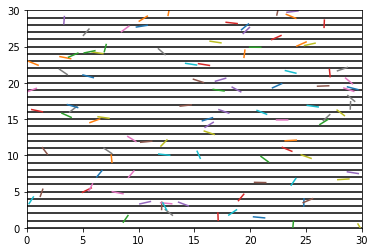

57
0.57


In [214]:
Agujas(100,20)
Agujas(100,10)
Agujas(100,30)

##### Análisis y Respuesta

La variación en este caso es mínima, siendo entre 2 a 3 agujas, que se traduce como un 0.02 y 0.03 respectivamente. Se observa que para 100 agujas la probabilidad de que alguna aguja lanzada caiga en una línea horizontal es mayor para cajas más pequeñas, ya que en la caja de 10x10 se obtuvo un 0.62, y en las cajas de 20x20 y 30x30 se obtuvo 0.60 y 0.57 respectivamente. Ratificando la afirmación del caso anterior.

###### 1000 agujas

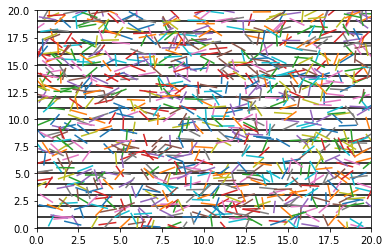

653
0.653


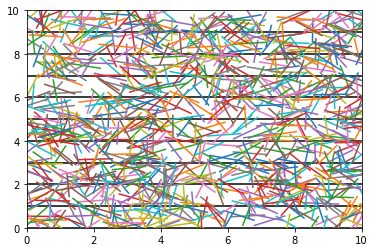

658
0.658


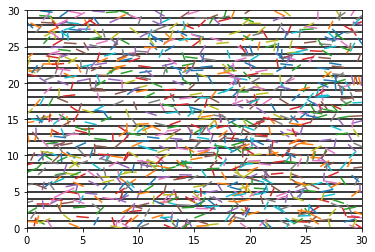

628
0.628


In [231]:
Agujas(1000,20)
Agujas(1000,10)
Agujas(1000,30)

##### Análisis y Respuesta

En este caso, con 1000 agujas, se presenta una gran variación en la cantidad de agujas, habiendo una diferencia de 30 y 25 agujas entre la caja de 30x30 y las de 10x10 y 20x20 respectivamente. A pesar de esta variación la probabilidad se mantuvo por sobre 0.6, el cual coincide, aproximadamente, con el caso anterior. En base a esto se puede concluir que la probabilidad de que una aguja caiga atravesando una línea horizontal, independiente del tamaño de la caja, es de 0.6 (60%).

A pesar de lo comentado anteriormente, es importante hacer notar que el tamaño de la caja reduce las probabilidades, en este caso para 1000 agujas, se reduce entre 0.05% y 3% por cada 10 unidades cuadradas adicionales.

###### Complemento

Se adjunta gráfico con el valor esperado de la probabilidad a través de una distribución binomial.

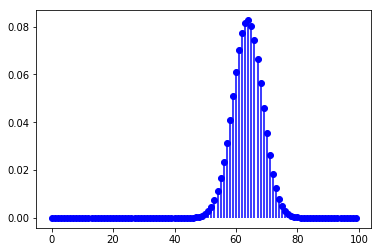

In [4]:
X = ss.binom(100, 2/mt.pi)
x = np.arange(100)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
plt.show()

Como se aprecia en el gráfico, para 100 agujas, hay una alta probabilidad de que la cantidad de agujas que atraviesen alguna línea horizontal sea entre 50 y 70 unidades, teniendo un pick por sobre las 60 agujas. Por lo tanto, se puede decir que cuando el numero de agujas tiende al _infinito_, la probabilidad tiende a _0,6_. Esto se comprueba con los experimentos antes realizados.

### 2.2 Cadenas de Markov

>a) Identifique la matriz de transición y la matriz de estado inicial

**R.-** La matriz de transición y la de estado inicial se muestran a continuación

In [78]:
mtrans = np.matrix('0.65 0.20 0.15; 0.30 0.40 0.30; 0.10 0.20 0.70')
minicial = np.matrix('0.5 0.45 0.05')
mactual = minicial

print(mtrans,"\n")
print(minicial,"\n")

[[ 0.65  0.2   0.15]
 [ 0.3   0.4   0.3 ]
 [ 0.1   0.2   0.7 ]] 

[[ 0.5   0.45  0.05]] 



Para ayudar al entendimiento se presentan dos tablas que representan a ambas matrices

**S**: Sansafood ; **LDS**: LDS ltda ; **W**: Wenzi's

|  Matriz de transición|
|--------------------|


|         |    S    |   LDS  |   W   |
| :------:|:-------:|:------:|:-----:|
|  **S**  |   0.65  |   0.2  |  0.15 |
| **LDS** |   0.3   |   0.4  |  0.3  |
|  **W**  |   0.1   |   0.2  |  0.7  |

***



|  Matriz de estado inicial|
|--------------------|


|    S    |   LDS  |   W   |
|:-------:|:------:|:-----:|
|   0.5   | 0.45   |  0.05 |


>**O:** b) Haga un diagrama de transición 

**R.-** El diagrama de transición que representa el caso se muestra a continuación:

<img src="img/índice.png" style="float:center;height:500px">

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

**R.-**Sí, porque la matriz de transición es regular. Es decir, ninguna potencia de la matriz tiene entradas menor o igual a cero.

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

**R.-**Sí, existe la matriz estacionaria. Para obtenerla utilizamos la siguiente función.

**Estacionaria(array Mini, array Mtrans)**

_Función que genera la matriz estacionaria a partir de la matriz inicial **Mini** y la matriz de transición **Mtrans**._

In [76]:
def estacionaria(Mini,Mtrans):
    actual = Mini
    siguiente = actual*Mtrans
    while( (siguiente != actual).all()):
        actual = siguiente
        siguiente = actual*Mtrans
    return actual
    

##### Obtención de la matriz

Se presenta el resultado a través del código utilizado. Para entender mejor el resultado se dispone de una tabla que representa los resultados.

In [77]:
print(estacionaria(minicial,mtrans))

[[ 0.33333363  0.25        0.41666637]]



| Matriz Estacionaria|
|--------------------|


|    S    |   LDS  |   W   |
|:-------:|:------:|:-----:|
|   0.33  | 0.25   |  0.41 |


>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

**R.-** Para encontrar los valores requeridos se utilizará el siguiente código:

In [81]:
# definición de variables
x0 = 0.50
y0 = 0.45
z0 = 0.05

x1lx0 = 0.65
y1lx0 = 0.20
z1lx0 = 0.15

x1ly0 = 0.30
y1ly0 = 0.40
z1ly0 = 0.30

x1lz0 = 0.10
y1lz0 = 0.20
z1lz0 = 0.70

#cálculo de probabilidad Independiente

xn = x1lx0*x0 + x1ly0*y0 + x1lz0*z0 
yn = y1lx0*x0 + y1ly0*y0 + y1lz0*z0 
zn = z1lx0*x0 + z1ly0*y0 + z1lz0*z0 

n=100
count = 0

while(count<n):
    xn1 = x1lx0*xn + x1ly0*yn + x1lz0*zn
    yn1 = y1lx0*xn + y1ly0*yn + y1lz0*zn
    zn1 = z1lx0*xn + z1ly0*yn + z1lz0*zn
    xn = xn1
    yn = yn1 
    zn = zn1
    count+=1

# muestra de resultados
print(xn, yn, zn)
print(xn*400, yn*400, zn*400)

0.33333333333333337 0.25 0.4166666666666665
133.33333333333334 100.0 166.6666666666666


Para un mejor entendimiento se presentan los datos obtenidos en las siguientes tablas


| Probabilidad de clientes|
|--------------------|


|    S    |   LDS  |   W   |
|:-------:|:------:|:-----:|
|   0.33  | 0.25   |  0.41 |


| Cantidad de Clientes|
|--------------------|


|    S    |   LDS  |   W   |
|:-------:|:------:|:-----:|
|   133,3  | 100,0  |  166,6 |

**R.-** En base a los resultados obtenidos la compañía que tendrá una mayor cantidad de clientes es _Wenzi'z_, con una cantidad de 166,6 clientes. En cuanto a las otras compañías, _Sansafood_ tendrá 133,3 clientes y _LDS ltda_ tendrá 100,0 clientes.